In [1]:
patient_dataset = 'ILPD.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Loading the data
df = pd.read_csv(patient_dataset, sep=',', decimal='.', header=None, names=['Age','Gender','Total Bilirubin','Direct Bilirubin', 'Alkaline phosphotase', 'SGPT', 'SGOT', 'Total Proteins', 'Albumin', 'A/G Ratio', 'Label'])

In [4]:
#Checking if the loaded data is equivalent to the original data
df.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline phosphotase,SGPT,SGOT,Total Proteins,Albumin,A/G Ratio,Label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
#Making sure the loaded data is equivalent to the original data
df.tail()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline phosphotase,SGPT,SGOT,Total Proteins,Albumin,A/G Ratio,Label
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [6]:
#Checking data types of the columns
df.dtypes

Age                       int64
Gender                   object
Total Bilirubin         float64
Direct Bilirubin        float64
Alkaline phosphotase      int64
SGPT                      int64
SGOT                      int64
Total Proteins          float64
Albumin                 float64
A/G Ratio               float64
Label                     int64
dtype: object

In [7]:
#Before beginning with the cleaning process, checking number of missing values in the dataset
print df.isnull().sum()

Age                     0
Gender                  0
Total Bilirubin         0
Direct Bilirubin        0
Alkaline phosphotase    0
SGPT                    0
SGOT                    0
Total Proteins          0
Albumin                 0
A/G Ratio               4
Label                   0
dtype: int64


In [8]:
#Dealing with missing values in the dataset by dropping any rows with null values
missing_values = df['A/G Ratio'].isnull()
df.loc[missing_values]

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline phosphotase,SGPT,SGOT,Total Proteins,Albumin,A/G Ratio,Label
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [9]:
df = df.drop([209,241,253,312], axis=0)
df.isnull().sum()

Age                     0
Gender                  0
Total Bilirubin         0
Direct Bilirubin        0
Alkaline phosphotase    0
SGPT                    0
SGOT                    0
Total Proteins          0
Albumin                 0
A/G Ratio               0
Label                   0
dtype: int64

In [10]:
#Descriptive statistics for the Age column
df['Age'].describe()

count    579.000000
mean      44.782383
std       16.221786
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: Age, dtype: float64

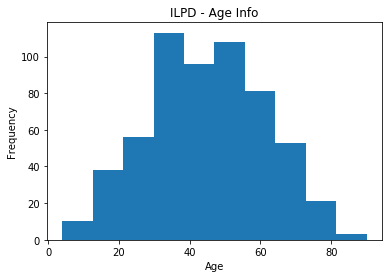

In [11]:
#Creating a visualization for Age which is a column with ordinal values
df['Age'].plot(kind='hist', bins=10)
plt.title('ILPD - Age Info')
plt.xlabel('Age')
plt.show()

In [12]:
#Descriptive statistics for the Gender column
df['Gender'].describe()

count      579
unique       2
top       Male
freq       439
Name: Gender, dtype: object

In [13]:
#Converting values in Gender column to lower case to avoid any capital letter mismatches(if any)
df['Gender'] = df['Gender'].str.lower()
df['Gender'].value_counts()

male      439
female    140
Name: Gender, dtype: int64

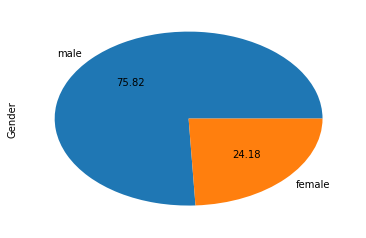

In [14]:
#Creating a visualization for Gender which is a column with nominal values
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

In [15]:
#Descriptive statistics for the Total Bilirubin column
df['Total Bilirubin'].describe()

count    579.000000
mean       3.315371
std        6.227716
min        0.400000
25%        0.800000
50%        1.000000
75%        2.600000
max       75.000000
Name: Total Bilirubin, dtype: float64

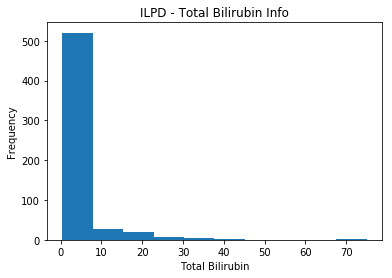

In [16]:
#Creating a visualization for Total Bilirubin which is a column with numerical values
df['Total Bilirubin'].plot(kind='hist', bins=10)
plt.title('ILPD - Total Bilirubin Info')
plt.xlabel('Total Bilirubin')
plt.show()

In [17]:
#Descriptive statistics for the Direct Bilirubin column
df['Direct Bilirubin'].describe()

count    579.000000
mean       1.494128
std        2.816499
min        0.100000
25%        0.200000
50%        0.300000
75%        1.300000
max       19.700000
Name: Direct Bilirubin, dtype: float64

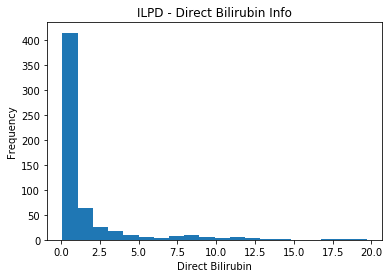

In [18]:
#Creating a visualization for Direct Bilirubin which is a column with numerical values
df['Direct Bilirubin'].plot(kind='hist', bins=20)
plt.title('ILPD - Direct Bilirubin Info')
plt.xlabel('Direct Bilirubin')
plt.show()

In [19]:
#Descriptive statistics for the Alkaline Phosphotase column
df['Alkaline phosphotase'].describe()

count     579.000000
mean      291.366149
std       243.561863
min        63.000000
25%       175.500000
50%       208.000000
75%       298.000000
max      2110.000000
Name: Alkaline phosphotase, dtype: float64

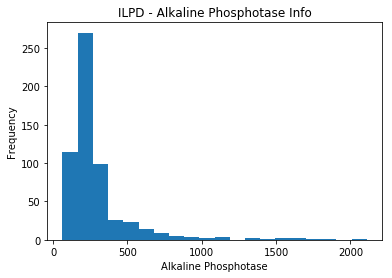

In [20]:
#Creating a visualization for Alkaline phosphotase which is a column with numerical values
df['Alkaline phosphotase'].plot(kind='hist', bins=20)
plt.title('ILPD - Alkaline Phosphotase Info')
plt.xlabel('Alkaline Phosphotase')
plt.show()

In [21]:
#Descriptive statistics for the SGPT column
df['SGPT'].describe()

count     579.000000
mean       81.126079
std       183.182845
min        10.000000
25%        23.000000
50%        35.000000
75%        61.000000
max      2000.000000
Name: SGPT, dtype: float64

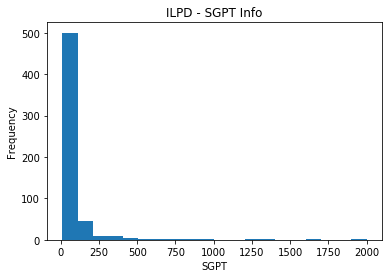

In [22]:
#Creating a visualization for SGPT which is a column with numerical values
df['SGPT'].plot(kind='hist', bins=20)
plt.title('ILPD - SGPT Info')
plt.xlabel('SGPT')
plt.show()

In [23]:
#Descriptive statistics for the SGOT column
df['SGOT'].describe()

count     579.000000
mean      110.414508
std       289.850034
min        10.000000
25%        25.000000
50%        42.000000
75%        87.000000
max      4929.000000
Name: SGOT, dtype: float64

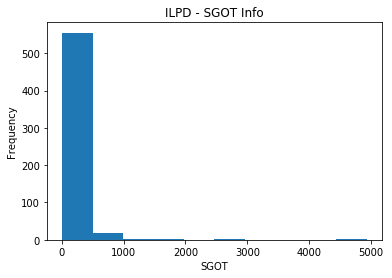

In [24]:
#Creating a visualization for SGOT which is a column with numerical values
df['SGOT'].plot(kind='hist', bins=10)
plt.title('ILPD - SGOT Info')
plt.xlabel('SGOT')
plt.show()

In [25]:
#Descriptive statistics for the Total Proteins column
df['Total Proteins'].describe()

count    579.000000
mean       6.481693
std        1.084641
min        2.700000
25%        5.800000
50%        6.600000
75%        7.200000
max        9.600000
Name: Total Proteins, dtype: float64

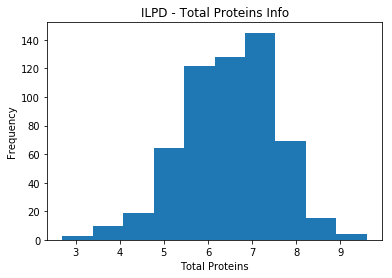

In [26]:
#Creating a visualization for Total Proteins which is a column with numerical values
df['Total Proteins'].plot(kind='hist',bins=10)
plt.title('ILPD - Total Proteins Info')
plt.xlabel('Total Proteins')
plt.show()

In [27]:
#Descriptive statistics for the Albumin column
df['Albumin'].describe()

count    579.000000
mean       3.138515
std        0.794435
min        0.900000
25%        2.600000
50%        3.100000
75%        3.800000
max        5.500000
Name: Albumin, dtype: float64

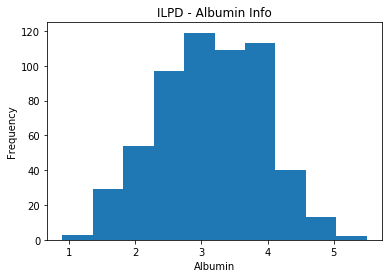

In [28]:
#Creating a visualization for Alkaline phosphotase which is a column with numerical values
df['Albumin'].plot(kind='hist', bins=10)
plt.title('ILPD - Albumin Info')
plt.xlabel('Albumin')
plt.show()

In [29]:
#Descriptive statistics for the A/G Ratio column
df['A/G Ratio'].describe()

count    579.000000
mean       0.947064
std        0.319592
min        0.300000
25%        0.700000
50%        0.930000
75%        1.100000
max        2.800000
Name: A/G Ratio, dtype: float64

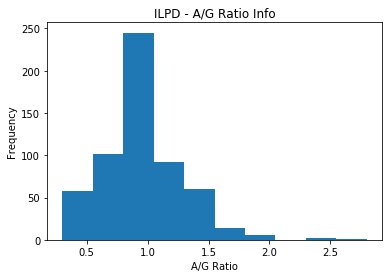

In [30]:
#Creating a visualization for A/G Ratio which is a column with numerical values
df['A/G Ratio'].plot(kind='hist', bins=10)
plt.title('ILPD - A/G Ratio Info')
plt.xlabel('A/G Ratio')
plt.show()

In [31]:
#Counting values for each label in the Label column
df['Label'].value_counts()

1    414
2    165
Name: Label, dtype: int64

C:\Users\lenovo\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


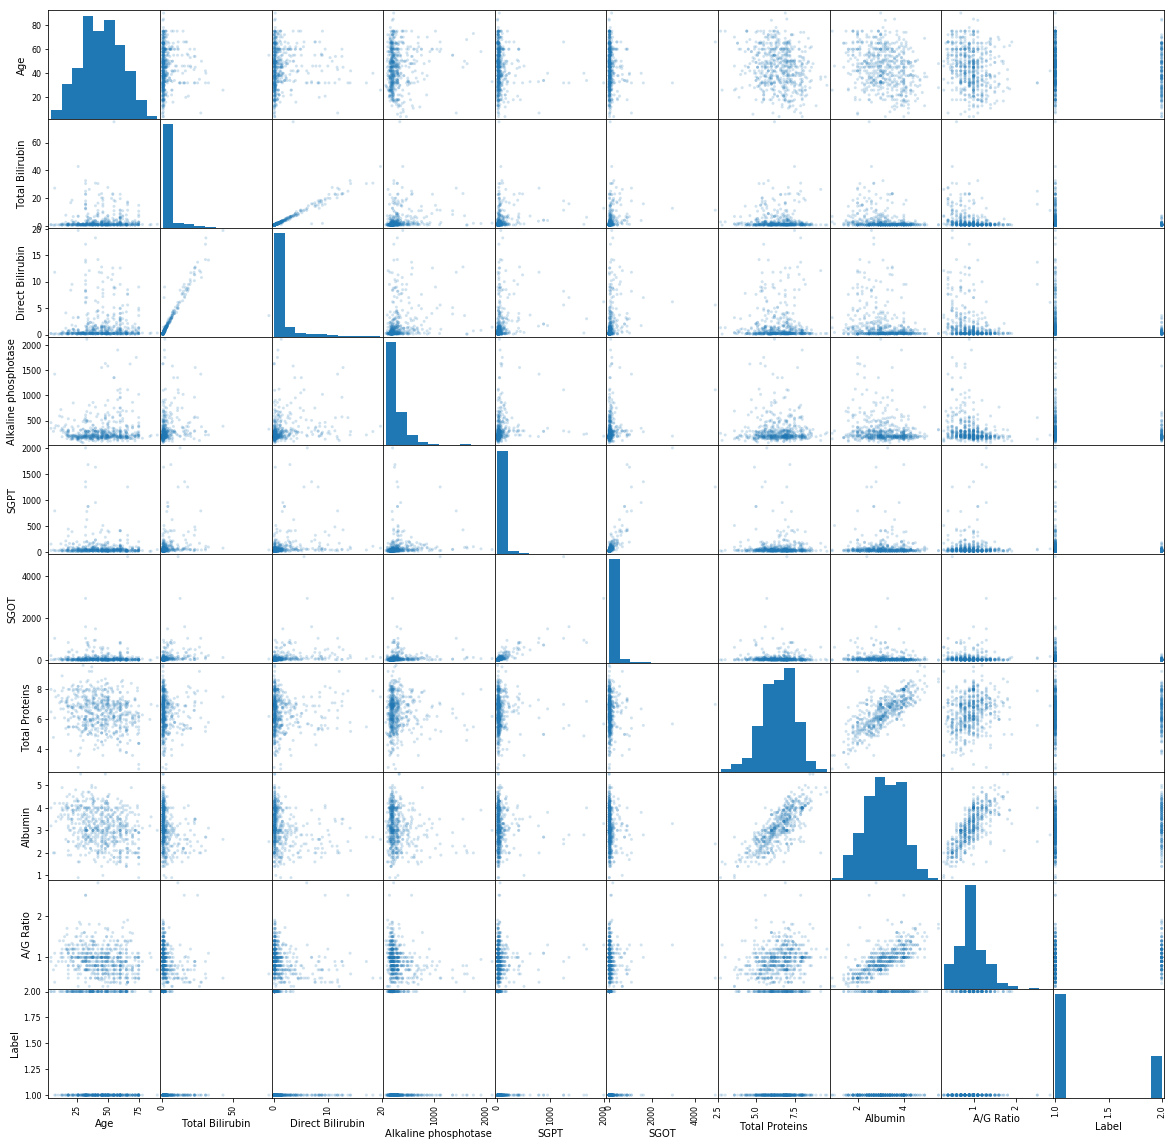

In [32]:
#Data Exploration
#Scatter matrix for all numerical columns


from pandas.tools.plotting import scatter_matrix
scatter_matrix(df,alpha=0.2,figsize=(20,20),diagonal='hist')
plt.show()

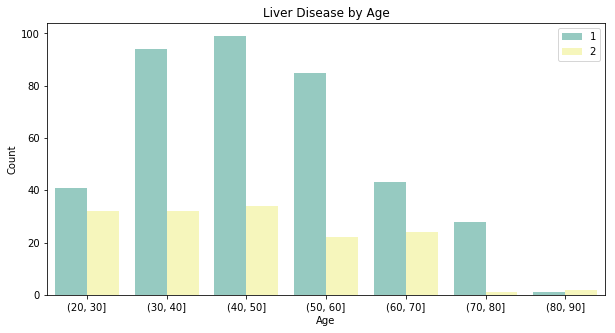

In [33]:
#New Visualization for Liver Disease by Age
import seaborn as sns
plt.figure(figsize = (10,5))
new_bins = [20,30,40,50,60,70,80,90]
df['Bin_Age'] = pd.cut(df['Age'],bins=new_bins)
d1=sns.countplot(x='Bin_Age',data=df,hue='Label',palette='Set3',linewidth=3)
d1.set_title('Liver Disease by Age')
d1.set_xlabel('Age')
d1.set_ylabel('Count')
d1.legend()

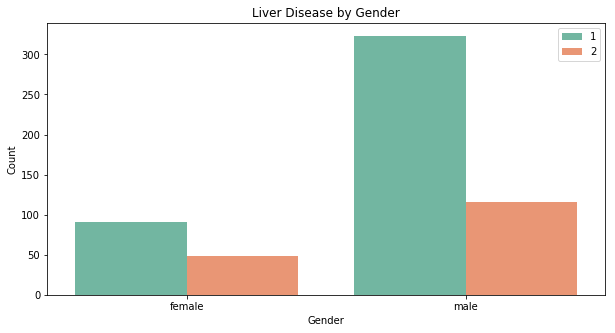

In [34]:
#New Visualization for Liver Disease by Gender
plt.figure(figsize = (10,5))
#new_bins = [20,30,40,50,60,70,80,90]
#df['Bin_Age'] = pd.cut(df['Age'],bins=new_bins)
d2=sns.countplot(x='Gender',data=df,hue='Label',palette='Set2',linewidth=3)
d2.set_title('Liver Disease by Gender')
d2.set_xlabel('Gender')
d2.set_ylabel('Count')
d2.legend()

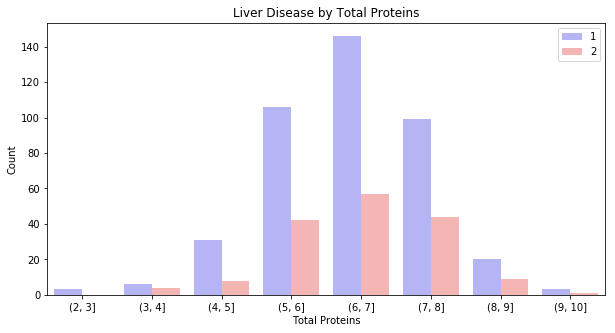

In [35]:
#New Visualization for Liver Disease by Total Proteins
plt.figure(figsize = (10,5))
tp_bins = [2,3,4,5,6,7,8,9,10]
df['Bin_Proteins'] = pd.cut(df['Total Proteins'],bins=tp_bins)
d3=sns.countplot(x='Bin_Proteins',data=df,hue='Label',palette='bwr',linewidth=3)
d3.set_title('Liver Disease by Total Proteins')
d3.set_xlabel('Total Proteins')
d3.set_ylabel('Count')
d3.legend()

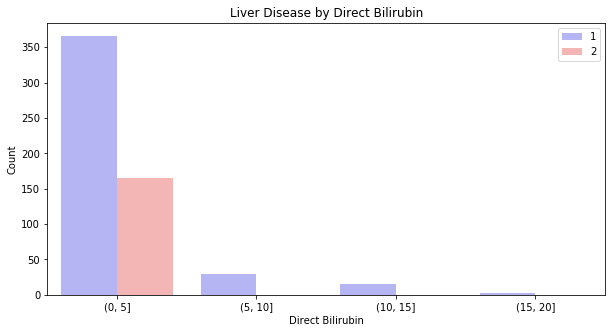

In [36]:
#New Visualization for Liver Disease by Direct Bilirubin
plt.figure(figsize = (10,5))
db_bins = [0,5,10,15,20]
df['Bin_DB'] = pd.cut(df['Direct Bilirubin'],bins=db_bins)
d4=sns.countplot(x='Bin_DB',data=df,hue='Label',palette='bwr',linewidth=3)
d4.set_title('Liver Disease by Direct Bilirubin')
d4.set_xlabel('Direct Bilirubin')
d4.set_ylabel('Count')
d4.legend()

In [37]:
#Creating a mapping dictionary that contains each column to process as well as a dictionary of the values to translate 
#For Gender values and replacing female ->0 and male->1 
cols_to_be_converted = { "Gender":     {"female": 0, "male": 1}}
df.replace(cols_to_be_converted, inplace=True)
df.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline phosphotase,SGPT,SGOT,Total Proteins,Albumin,A/G Ratio,Label,Bin_Age,Bin_Proteins,Bin_DB
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1,"(60, 70]","(6, 7]","(0, 5]"
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1,"(60, 70]","(7, 8]","(5, 10]"
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1,"(60, 70]","(6, 7]","(0, 5]"
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1,"(50, 60]","(6, 7]","(0, 5]"
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1,"(70, 80]","(7, 8]","(0, 5]"


In [38]:
# Create feature and label datasets for training
feature_names = np.array(df.drop(['Label','Bin_Age','Bin_Proteins','Bin_DB'], 1))
target = np.array(df['Label'])

In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(feature_names)
y = target

In [40]:
#Splitting into train and test set with 50% for training and 50% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50,random_state=4)

In [41]:
# we build the k-nearest neighbour classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [42]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
predicted = knn_clf.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
print accuracy_score(y_test,predicted)

0.6724137931034483


In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted)
print cm

[[160  47]
 [ 48  35]]


In [46]:
from sklearn.metrics import classification_report
print classification_report(y_test, predicted)

              precision    recall  f1-score   support

           1       0.77      0.77      0.77       207
           2       0.43      0.42      0.42        83

   micro avg       0.67      0.67      0.67       290
   macro avg       0.60      0.60      0.60       290
weighted avg       0.67      0.67      0.67       290



In [47]:
# Printing the Classification Error Rate
print "[Train/test split] score: {:.5f}".format(knn_clf.score(X_test, y_test))

[Train/test split] score: 0.67241


In [48]:
#Parameter tuning with k-fold cross validation
# creating a list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
#neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10-fold cross validation
for k in myList:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 30


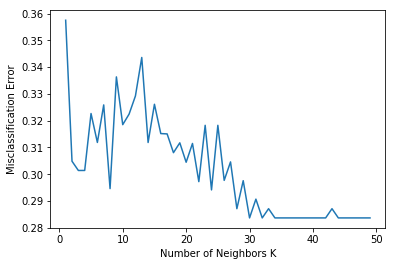

In [49]:
# Plotting the misclassification error versus K
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = myList[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(myList, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [50]:
# we rebuild the k-nearest neighbour classifier for optimal no. of neighbors obtained from above
knn_clf = KNeighborsClassifier(n_neighbors=30, weights='uniform')

In [51]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')

In [52]:
predicted = knn_clf.predict(X_test)

In [53]:
print accuracy_score(y_test,predicted)

0.7137931034482758


In [54]:
cm = confusion_matrix(y_test, predicted)
print cm

[[204   3]
 [ 80   3]]


In [55]:
print classification_report(y_test, predicted)

              precision    recall  f1-score   support

           1       0.72      0.99      0.83       207
           2       0.50      0.04      0.07        83

   micro avg       0.71      0.71      0.71       290
   macro avg       0.61      0.51      0.45       290
weighted avg       0.66      0.71      0.61       290



In [56]:
# Printing the Classification Error Rate
print "[Train/test split] score: {:.5f}".format(knn_clf.score(X_test, y_test))

[Train/test split] score: 0.71379


In [57]:
# Grid search for random forest, followed by prediction based on the best parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state=1)

param_grid = [{'bootstrap': [True, False],
              'max_features':['auto', 'sqrt','log2'],
              'n_estimators':[400, 600, 800, 1000],
              'max_depth' : [10, 20, 30, 40, 50]
             }]

random_grid = GridSearchCV(clf, param_grid, n_jobs=+1, cv = 2)
random_grid.fit(X_train, y_train)

#random_grid

best_grid = random_grid.best_score_
best_param = random_grid.best_params_

In [58]:
best_param

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 600}

In [59]:
best_grid

0.7577854671280276

In [60]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1234)
clf = RandomForestClassifier(max_depth = 10, n_estimators =  600)
clf = clf.fit(X_train,y_train)
clf.score (X_test, y_test)

0.6758620689655173

In [61]:
y_pre = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pre)
print cm

[[174  33]
 [ 61  22]]


In [62]:
print classification_report(y_test, y_pre)

              precision    recall  f1-score   support

           1       0.74      0.84      0.79       207
           2       0.40      0.27      0.32        83

   micro avg       0.68      0.68      0.68       290
   macro avg       0.57      0.55      0.55       290
weighted avg       0.64      0.68      0.65       290



In [63]:
# Printing the Classification Error Rate
print "[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test))

[Train/test split] score: 0.67586


In [64]:
#Splitting into train and test set with 60% for training and 40% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=4)

In [65]:
#Parameter tuning with k-fold cross validation
# creating a list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
#neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10-fold cross validation
for k in myList:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 4


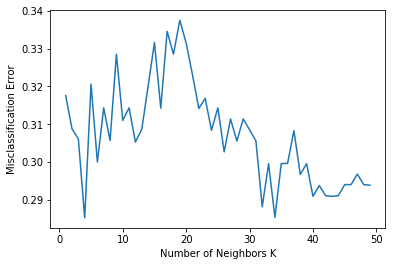

In [66]:
# Plotting the misclassification error versus K
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = myList[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(myList, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [67]:
# we build the k-nearest neighbour classifier for this split 60-40
knn_clf = KNeighborsClassifier(4)
knn_clf.fit(X_train, y_train)
predicted = knn_clf.predict(X_test)

In [68]:
#Confusion matrix for this split using KNN
cm = confusion_matrix(y_test, predicted)
print cm

[[146  22]
 [ 46  18]]


In [69]:
#Precision, Recall and F1-Score for this split
print classification_report(y_test, predicted)

              precision    recall  f1-score   support

           1       0.76      0.87      0.81       168
           2       0.45      0.28      0.35        64

   micro avg       0.71      0.71      0.71       232
   macro avg       0.61      0.58      0.58       232
weighted avg       0.67      0.71      0.68       232



In [70]:
# Printing the Classification Error Rate
print "[Train/test split] score: {:.5f}".format(knn_clf.score(X_test, y_test))

[Train/test split] score: 0.70690


In [ ]:
# Grid search for random forest, followed by prediction based on the best parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state=1)

param_grid = [{'bootstrap': [True, False],
              'max_features':['auto', 'log2'],
              'n_estimators':[400, 600, 800, 1000],
              'max_depth' : [10, 20, 30, 40, 50, 60, 60, 70, 80,90, 100]
             }]

random_grid = GridSearchCV(clf, param_grid, n_jobs=+1, cv = 3)
random_grid.fit(X_train, y_train)

#random_grid

best_grid = random_grid.best_score_
best_param = random_grid.best_params_

In [ ]:
best_param

In [ ]:
best_grid

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1234)
clf = RandomForestClassifier(max_depth = 20, n_estimators =  600)
clf = clf.fit(X_train,y_train)
clf.score (X_test, y_test)

In [ ]:
y_pre = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pre)
print cm

In [ ]:
print classification_report(y_test, y_pre)

In [ ]:
# Printing the Classification Error Rate
print "[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test))

In [ ]:
#Splitting into train and test set with 80% for training and 20% for testing

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=4)

In [ ]:
# we build the k-nearest neighbour classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [ ]:
knn_clf.fit(X_train, y_train)

In [ ]:
predicted = knn_clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, predicted)
print cm

In [ ]:
print classification_report(y_test, predicted)

In [ ]:
print "[Train/test split] score: {:.5f}".format(knn_clf.score(X_test, y_test))

In [ ]:
#Parameter tuning with k-fold cross validation
# creating a list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
#neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10-fold cross validation
for k in myList:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_clf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [ ]:
# Plotting the misclassification error versus K
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = myList[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(myList, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
# we build the k-nearest neighbour classifier for the 80-20 split
knn_clf = KNeighborsClassifier(n_neighbors=33, weights='distance')
knn_clf.fit(X_train, y_train)
predicted = knn_clf.predict(X_test)

In [ ]:
#Confusion matrix for this split using KNN
cm = confusion_matrix(y_test, predicted)
print cm

In [ ]:
#Precision, Recall and F1-Score for this split
print classification_report(y_test, predicted)

In [ ]:
# Printing the Classification Error Rate
print "[Train/test split] score: {:.5f}".format(knn_clf.score(X_test, y_test))

In [ ]:
# Grid search for random forest, followed by prediction based on the best parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state=1)

param_grid = [{'bootstrap': [True, False],
              'max_features':['auto', 'log2'],
              'n_estimators':[400, 600, 800, 1000],
              'max_depth' : [10, 20, 30, 40, 50]
             }]

random_grid = GridSearchCV(clf, param_grid, n_jobs=+1, cv = 3)
random_grid.fit(X_train, y_train)

#random_grid

best_grid = random_grid.best_score_
best_param = random_grid.best_params_

In [ ]:
best_param

In [ ]:
best_grid

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1234)
clf = RandomForestClassifier(max_depth = 10, n_estimators = 400)
clf = clf.fit(X_train,y_train)
clf.score (X_test, y_test)

In [ ]:
y_pre = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pre)
print cm

In [ ]:
print classification_report(y_test, y_pre)

In [ ]:
# Printing the Classification Error Rate
print "[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test))